In [1]:
# Importing Libraries 
import pandas as pd
import warnings
#Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
import pydotplus
import numpy as np

### train model libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy


# Classifier libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

#save model libraries
import pickle

In [2]:
warnings.filterwarnings("ignore")
loan_df = pd.read_csv('Resources/LoanApprovalPrediction.csv')
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [3]:
# Summary of numerical variables for training data set
loan_df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


 Data Analysis:
There are total 13 columns including target variable(loan status), all of them are self explanatory.

Missing values for the columns: 

Dependents,
loan amount,
loan amount,
Credit_history term 

drop null values for missing values for categorical and numerical columns


Numerical and Categorical values assigned to columns

In [4]:
loan_df=loan_df.dropna()

In [5]:
############ Count number of Categorical and Numerical Columns ######################
loan_df = loan_df.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']


print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


### Analysis for Categorical Values:

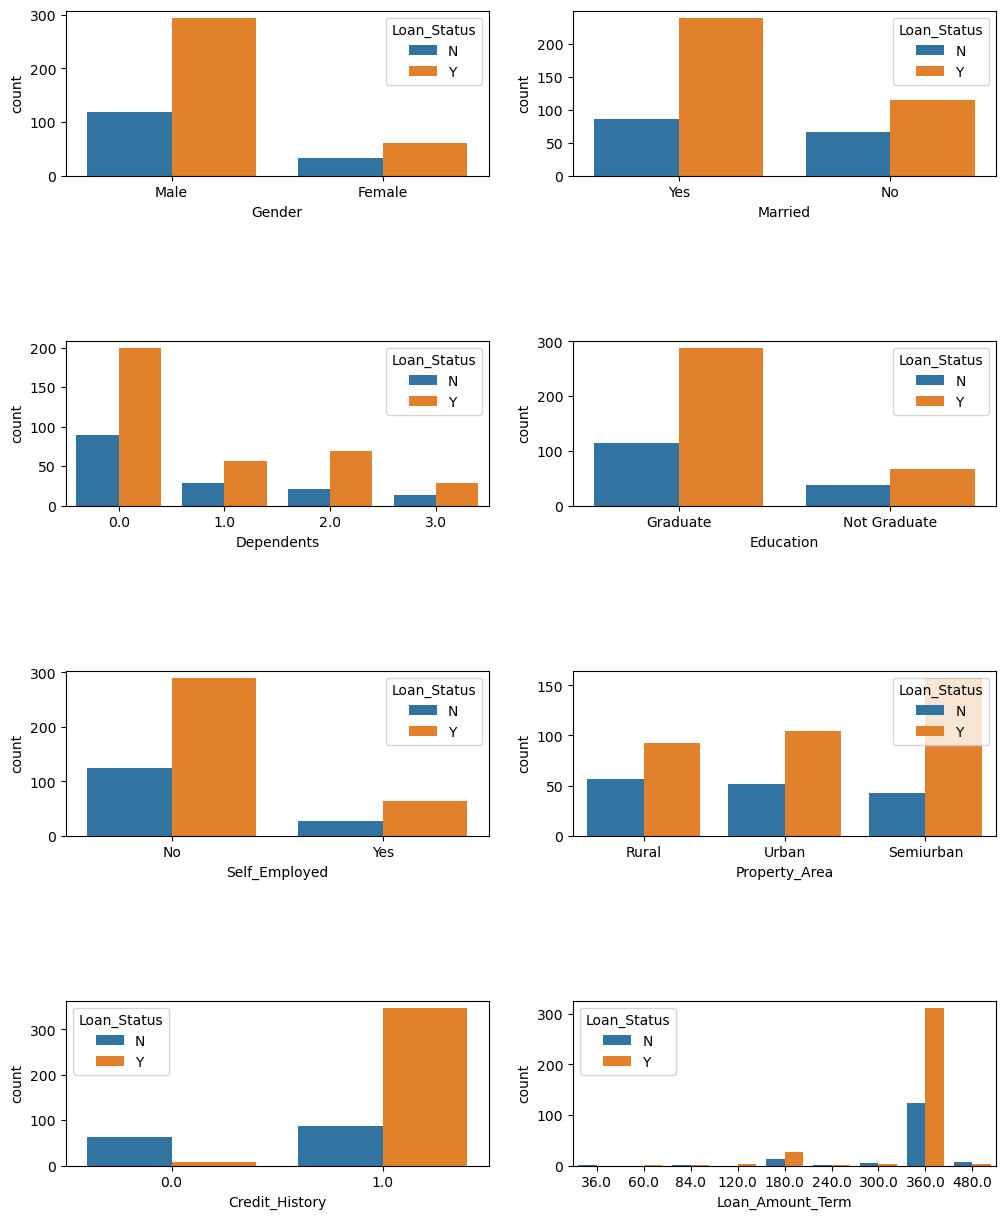

In [6]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loan_df,hue='Loan_Status',ax=axes[row,col])

plt.savefig("Images/Categorical_values.png")
plt.subplots_adjust(hspace=1)

Analysis for Categorical Columns from the above graph:

Loan Approval Status: About '2/3rd' of applicants have been granted loan.

Sex: There are more Men than Women (approx. '3x')

Martial Status: '2/3rd' of the population in the dataset is Marred; Married applicants are more likely to be granted loans.

Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.

Education: About '5/6th' of the population is Graduate and graduates have higher propotion of loan approval.

Employment: '5/6th' of population is not self employed.

Property Area: More applicants from Semi-urban and also likely to be granted loans.

Credit history: Applicant with credit history are far more likely to be accepted.

Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

In [7]:
# Get the unique values and their frequency of variable Property_Area
loan_df['Property_Area'].value_counts()

Property_Area
Semiurban    200
Urban        156
Rural        149
Name: count, dtype: int64

### Analysis for Numerical Values:

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       505.000000         505.000000  505.000000
mean       5411.427723        1562.978059  144.566337
std        6127.874416        2564.980770   81.306177
min         150.000000           0.000000    9.000000
25%        2895.000000           0.000000  100.000000
50%        3833.000000        1126.000000  128.000000
75%        5818.000000        2253.000000  167.000000
max       81000.000000       33837.000000  600.000000


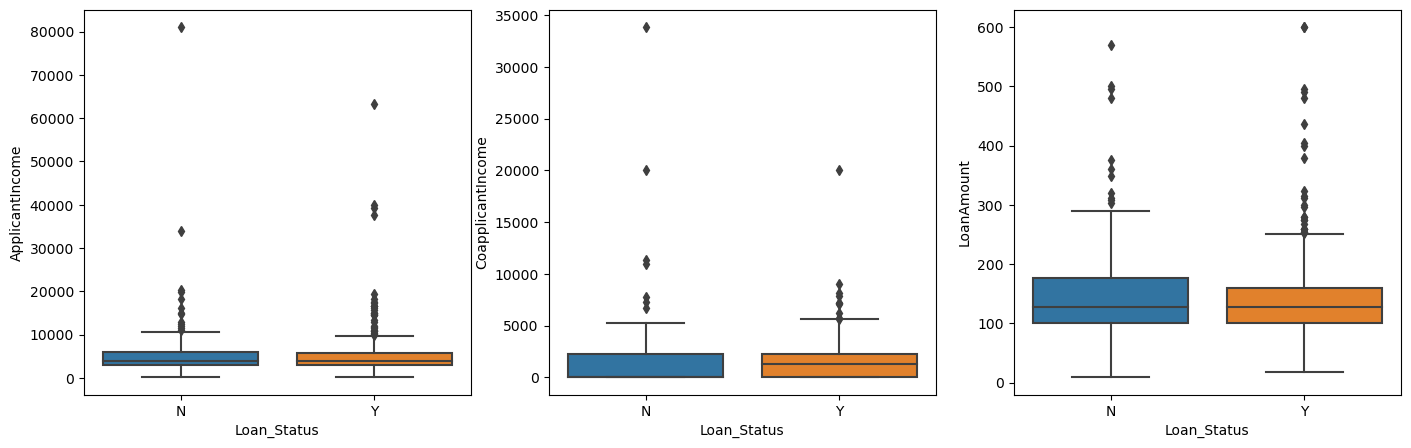

In [8]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=loan_df,x='Loan_Status',ax=axes[idx])

print(loan_df[numerical_columns].describe())
plt.savefig("Images/Analytical_values.png")
plt.subplots_adjust(hspace=1)

From the above box plot analysis: No sinificant relation between Applicant income, coapplicant income ,loan amount  with the loan status.

### Preprocessing Data:

Encoding Categorical Features.

In [9]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [10]:
# Encoding categrical Features:
loan_df_encoded = pd.get_dummies(loan_df,drop_first=True)
loan_df_encoded.head()


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,1.0,4583,1508.0,128.0,360.0,1.0,True,True,False,False,False,False,False
2,0.0,3000,0.0,66.0,360.0,1.0,True,True,False,True,False,True,True
3,0.0,2583,2358.0,120.0,360.0,1.0,True,True,True,False,False,True,True
4,0.0,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,True,True
5,2.0,5417,4196.0,267.0,360.0,1.0,True,True,False,True,False,True,True


In [11]:
# rename column name
loan_df_encoded = loan_df_encoded.rename(columns={'Education_Not Graduate': 'Not_graduate'})
loan_df_encoded.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Not_graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,1.0,4583,1508.0,128.0,360.0,1.0,True,True,False,False,False,False,False
2,0.0,3000,0.0,66.0,360.0,1.0,True,True,False,True,False,True,True
3,0.0,2583,2358.0,120.0,360.0,1.0,True,True,True,False,False,True,True
4,0.0,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,True,True
5,2.0,5417,4196.0,267.0,360.0,1.0,True,True,False,True,False,True,True


In [12]:
loan_area_df =  pd.get_dummies(loan_df, columns=['Property_Area'])
loan_df_encoded[["Property_Area_Rural"]]=loan_area_df[["Property_Area_Rural"]]
loan_df_encoded.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Not_graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Property_Area_Rural
1,1.0,4583,1508.0,128.0,360.0,1.0,True,True,False,False,False,False,False,True
2,0.0,3000,0.0,66.0,360.0,1.0,True,True,False,True,False,True,True,False
3,0.0,2583,2358.0,120.0,360.0,1.0,True,True,True,False,False,True,True,False
4,0.0,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,True,True,False
5,2.0,5417,4196.0,267.0,360.0,1.0,True,True,False,True,False,True,True,False


In [13]:
########## Split Features and Target Varible ############
X = loan_df_encoded.drop(columns='Loan_Status_Y')
y = loan_df_encoded['Loan_Status_Y']

################# Splitting into Train -Test Data #######
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
############### Handling/Imputing Missing values #############
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

### Model 1: Decision Tree Classifier

In [14]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.700286188270334
Validation Mean Accuracy:  0.7523456790123456


In [15]:
# Calculating the confusion matrix
tree_clf.fit(X_test,y_test)
y_pred = tree_clf.predict(X_test)

print("Testing Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Testing Data F1 Score ", f1_score(y_test,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_test,y_test,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_test,y_test,cv=5,scoring='accuracy').mean())

Testing Data Set Accuracy:  1.0
Testing Data F1 Score  1.0
Validation Mean F1 Score:  0.6479709471923043
Validation Mean Accuracy:  0.6923809523809524


In [16]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        30
        True       1.00      1.00      1.00        71

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



As above results Training Accuracy (1.0) equals to Test Accuracy (1.0), which is a overfit model.

Tuning further Tuning_Max_depth to check if it improves test accuracty

<Axes: xlabel='Max_Depth', ylabel='Values'>

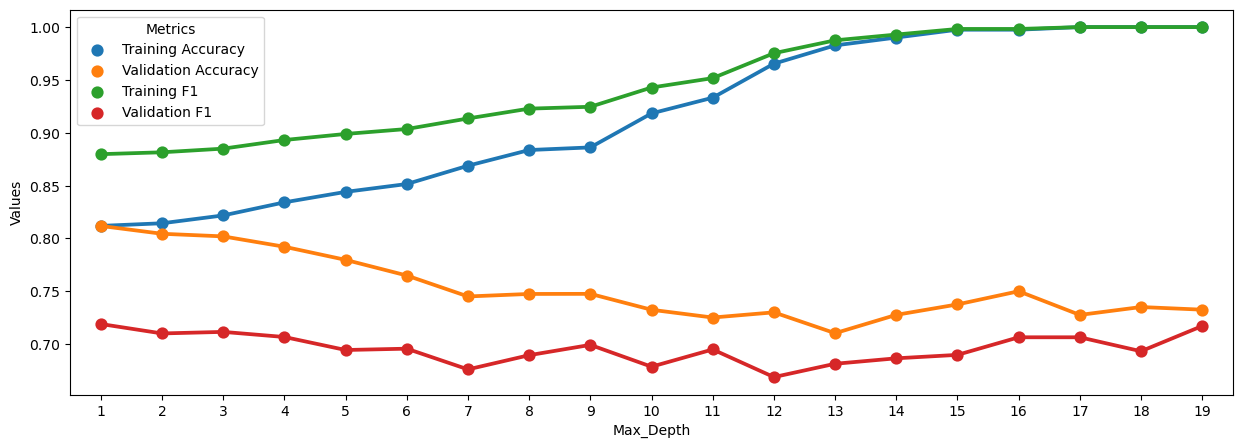

In [17]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
fig.savefig("Images/Decision_Tree_tuning.png")
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

When 'Max_Depth' = 3 will yield optimum Test accuracy

F1 score Optimum Test Accuracy ~ 0.805

Optimum F1 Score: ~0.7

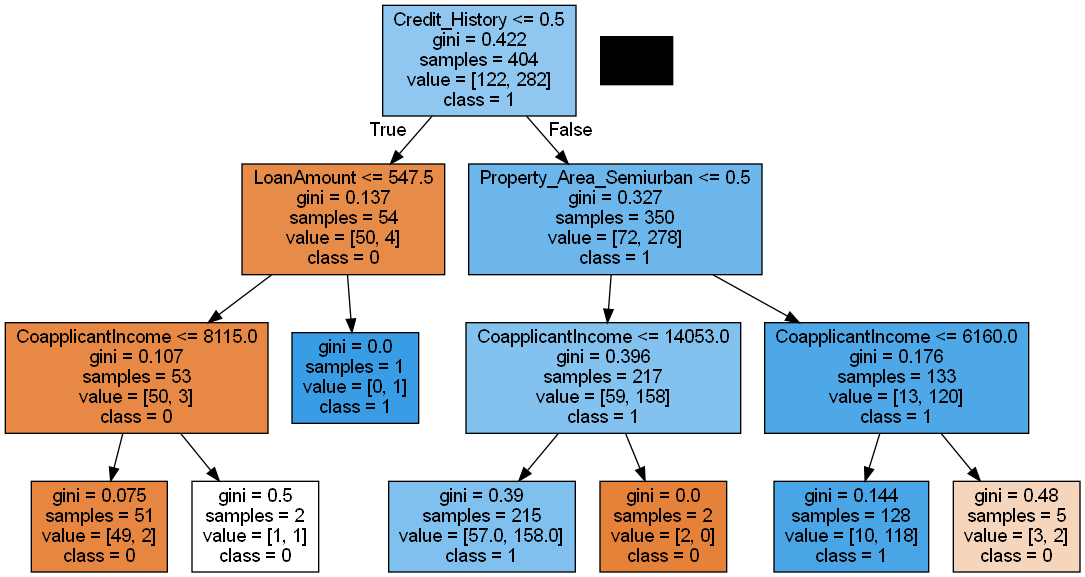

In [18]:
#Visulazing Decision Tree with Max Depth = 3
tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
# dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
dot_data = tree.export_graphviz(
    tree_clf, out_file=None, feature_names=X.columns.tolist(), class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [19]:
# Saving the tree as PDF
file_path = "Images/Decsion_tree.pdf"
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = "Images/Decsion_tree.png"
graph.write_png(file_path)

True

From the above some of the leafs have samples less than 5.

Need to further tune min_samples_leaf to improve test accuracy with max_depth 3.

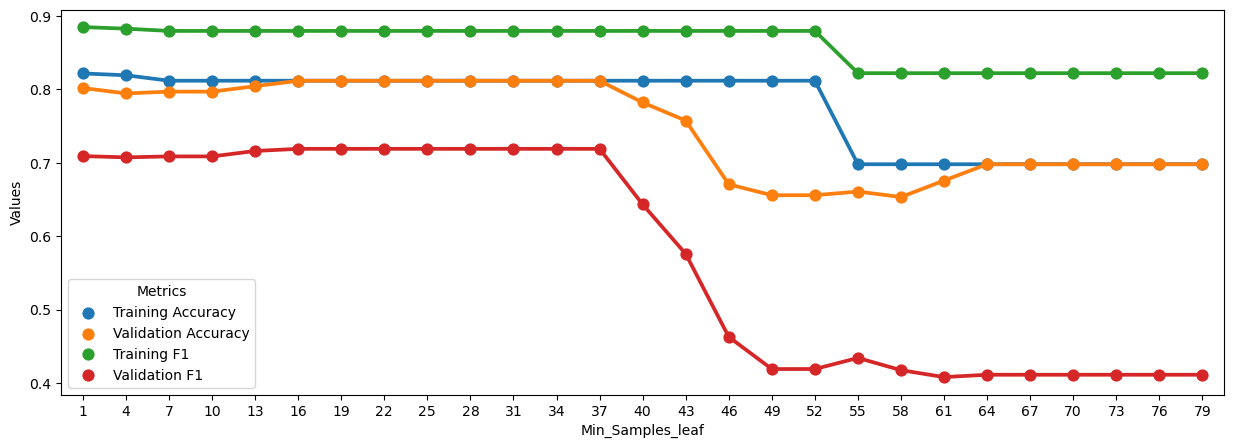

In [20]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []

for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)
fig.savefig("Images/Decision_Tree_tuning.png")

From above plot, we will choose Min_Samples_leaf to 25 to improve test accuracy.

Let's use this Decision Tree classifier on unseen test data and evaluate Test Accuracy, F1 Score and Confusion Matrix

In [21]:
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 25)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8118811881188119
Test F1 Score:  0.8774193548387097
Confusion Matrix on Test Data


Predicted,False,True,All
True,,,
False,14,16,30
True,3,68,71
All,17,84,101


In [22]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

       False       0.82      0.47      0.60        30
        True       0.81      0.96      0.88        71

    accuracy                           0.81       101
   macro avg       0.82      0.71      0.74       101
weighted avg       0.81      0.81      0.79       101



### Decsion Tree classification accuracy
From the above, after tuning further the model has shown 81%  classification accuracy 

### Model 3: Logistic Regression

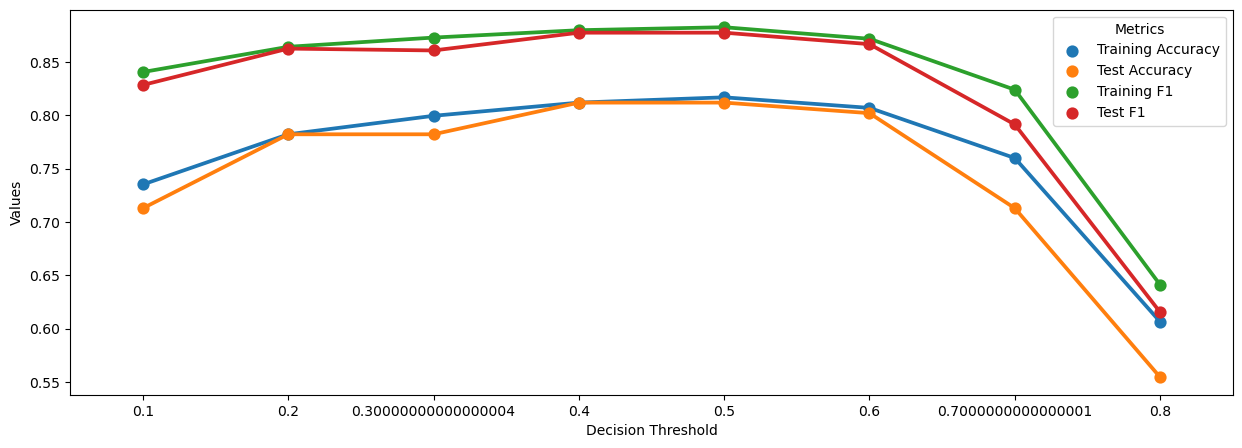

In [23]:
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

 ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): 
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)
plt.savefig("Images/Logistic_regression.png")

Logistic Regression does slightly better than Decision Tree.

Based on the above Test/Train curves, we can keep threshold to 0.4.

Now Finally let's look at Logistic Regression Confusion Matrix

In [24]:
# Threshold chosen from above Curves
thresh = 0.4
y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8118811881188119
Test F1 Score:  0.8774193548387097
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
False,14,16,30
True,3,68,71
All,17,84,101


In [25]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

       False       0.82      0.47      0.60        30
        True       0.81      0.96      0.88        71

    accuracy                           0.81       101
   macro avg       0.82      0.71      0.74       101
weighted avg       0.81      0.81      0.79       101



Logistic Regression Classification Accuracy:


Logistic Regression Confusion matrix is very similar to Decision Tree. In this analysis, we did extensive analysis of input data and were able to achieve Test Accuracy of 81 %

### Neural Network Model

In [26]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled
X_test_scaled

array([[ 1.23390539, -0.11186751, -0.55466377, ...,  1.20604538,
        -0.66953406, -0.62835814],
       [-0.7593264 ,  0.49478785, -0.55466377, ...,  1.20604538,
        -0.66953406, -0.62835814],
       [-0.7593264 , -0.40177878, -0.55466377, ...,  1.20604538,
        -0.66953406, -0.62835814],
       ...,
       [-0.7593264 , -0.35642546, -0.04640608, ...,  1.20604538,
        -0.66953406, -0.62835814],
       [-0.7593264 , -0.28117686,  0.04290667, ..., -0.8291562 ,
        -0.66953406,  1.59144911],
       [ 2.23052129, -0.14336693,  0.16019691, ...,  1.20604538,
        -0.66953406, -0.62835814]])

In [27]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=13))
# nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 70        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
#  Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100


12/12 [==============================] - 2s 9ms/step - loss: 0.7676 - accuracy: 0.6243
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7572 - accuracy: 0.6376
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7477 - accuracy: 0.6614
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7380 - accuracy: 0.6772
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7290 - accuracy: 0.6799
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7200 - accuracy: 0.6825
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.6852
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.6905
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.6905
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.6958
Epoch 

12/12 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.8228
Epoch 77/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.8228
Epoch 78/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4190 - accuracy: 0.8228
Epoch 79/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4188 - accuracy: 0.8228
Epoch 80/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4182 - accuracy: 0.8228
Epoch 81/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.8228
Epoch 82/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.8228
Epoch 83/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.8228
Epoch 84/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4167 - accuracy: 0.8228
Epoch 85/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4164 - accuracy: 0.8228
Epoch 86/100


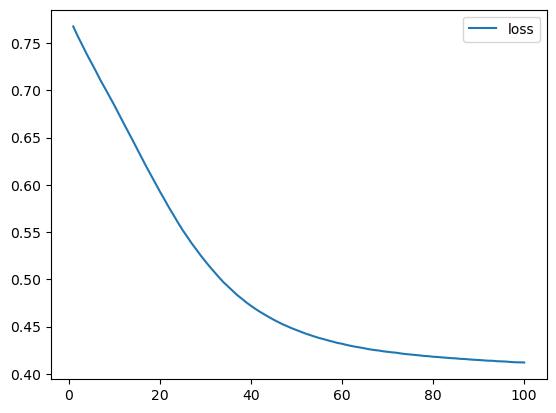

In [29]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.savefig("Images/Neural_Network_loss_history.png")
plt.show()

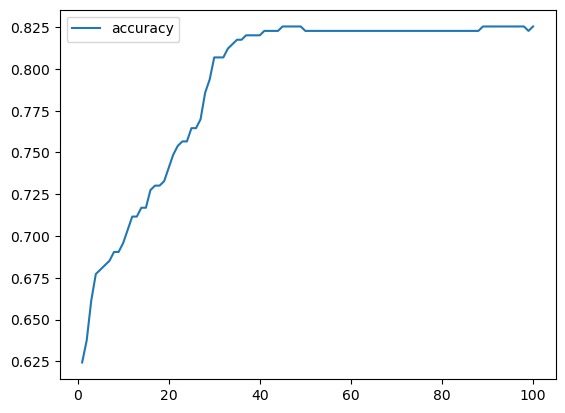

In [30]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.savefig("Images/Neural_Network_accuracy_score.png")
plt.show()

In [31]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - loss: 0.5201 - accuracy: 0.8031 - 301ms/epoch - 75ms/step
Loss: 0.5200967192649841, Accuracy: 0.8031495809555054


Neural network classification Accuracy:

From the above it has shown Test Accuracy of 82 %

### Train the Models

In [32]:
# Initialize an empty dictionary to store the results
results = {}

#function to train the models
def model_val(model_name,model,X,y):
    X = X.values
    y = y.values
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    
   # Train and evaluate each model   
    print(f'Processing {model_name}...')
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate the classification report
    report = classification_report(y_test, y_pred)
    
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)    
  
    
    # Store the results
    results[model_name] = {
      'Accuracy': round((accuracy*100),2),
      'Classification Report': report,
      'Confusion Matrix': conf_matrix
      }
    
    # Print the results
    print(f'{model_name}: \n')
    print(f'Accuracy: {accuracy}')
    print(f'Classification Report: \n{report}')
    print(f'Confusion Matrix: \n{conf_matrix}')
    print('\n'+'-'*50+'\n')

### Logistic regression

In [33]:
lr_model =  LogisticRegression()
model_val('Logistic Regression',lr_model,X,y)

Processing Logistic Regression...
Logistic Regression: 

Accuracy: 0.8217821782178217
Classification Report: 
              precision    recall  f1-score   support

       False       0.71      0.48      0.57        25
        True       0.85      0.93      0.89        76

    accuracy                           0.82       101
   macro avg       0.78      0.71      0.73       101
weighted avg       0.81      0.82      0.81       101

Confusion Matrix: 
[[12 13]
 [ 5 71]]

--------------------------------------------------



### Decision Tree

In [34]:
dt_model = DecisionTreeClassifier()
model_val('Decision Tree',dt_model,X,y)

Processing Decision Tree...
Decision Tree: 

Accuracy: 0.7029702970297029
Classification Report: 
              precision    recall  f1-score   support

       False       0.43      0.64      0.52        25
        True       0.86      0.72      0.79        76

    accuracy                           0.70       101
   macro avg       0.65      0.68      0.65       101
weighted avg       0.75      0.70      0.72       101

Confusion Matrix: 
[[16  9]
 [21 55]]

--------------------------------------------------



### Support Vector Machine

In [35]:
svc_model = svm.SVC()
model_val('Support Vector Machine',svc_model,X,y)

Processing Support Vector Machine...
Support Vector Machine: 

Accuracy: 0.7524752475247525
Classification Report: 
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        25
        True       0.75      1.00      0.86        76

    accuracy                           0.75       101
   macro avg       0.38      0.50      0.43       101
weighted avg       0.57      0.75      0.65       101

Confusion Matrix: 
[[ 0 25]
 [ 0 76]]

--------------------------------------------------



### K-Nearest Neighbors

In [36]:
kn_model = KNeighborsClassifier()
model_val('K-Nearest Neighbors',kn_model,X,y)

Processing K-Nearest Neighbors...
K-Nearest Neighbors: 

Accuracy: 0.7128712871287128
Classification Report: 
              precision    recall  f1-score   support

       False       0.25      0.08      0.12        25
        True       0.75      0.92      0.83        76

    accuracy                           0.71       101
   macro avg       0.50      0.50      0.47       101
weighted avg       0.63      0.71      0.65       101

Confusion Matrix: 
[[ 2 23]
 [ 6 70]]

--------------------------------------------------



### RandomForestClassifier

In [37]:
rfc_model = RandomForestClassifier()
model_val('Random Forest',rfc_model,X,y)

Processing Random Forest...
Random Forest: 

Accuracy: 0.8712871287128713
Classification Report: 
              precision    recall  f1-score   support

       False       0.80      0.64      0.71        25
        True       0.89      0.95      0.92        76

    accuracy                           0.87       101
   macro avg       0.84      0.79      0.81       101
weighted avg       0.87      0.87      0.87       101

Confusion Matrix: 
[[16  9]
 [ 4 72]]

--------------------------------------------------



In [38]:
# Initialize variables to keep track of the best model and its accuracy
best_model_name = None
best_model_accuracy = 0

# Iterate through the results
for model_name, result in results.items():
  
    # If this model has a higher accuracy than the current best, update the best model
    if result['Accuracy'] > best_model_accuracy:
        best_model_name = model_name
        best_model_accuracy = result['Accuracy']

print(f'The best model is {best_model_name} with an accuracy of {best_model_accuracy}')


The best model is Random Forest with an accuracy of 87.13


In [39]:
# Create a dataframe to print the train model results
df = pd.DataFrame.from_dict(results)
df.head()

,Logistic Regression,Decision Tree,Support Vector Machine,K-Nearest Neighbors,Random Forest
Accuracy,82.18,70.3,75.25,71.29,87.13
Classification Report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...
Confusion Matrix,"[[12, 13], [5, 71]]","[[16, 9], [21, 55]]","[[0, 25], [0, 76]]","[[2, 23], [6, 70]]","[[16, 9], [4, 72]]"


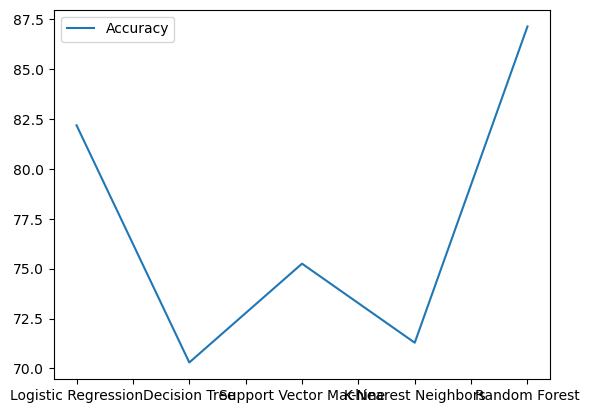

In [40]:
trained_df= df.head(1)
final_df=pd.DataFrame.transpose(trained_df)
#plot the accuracry scores for the trained models
final_df.plot()
plt.savefig("Images/Trained_models_accuracy_score_1.png")
plt.show()

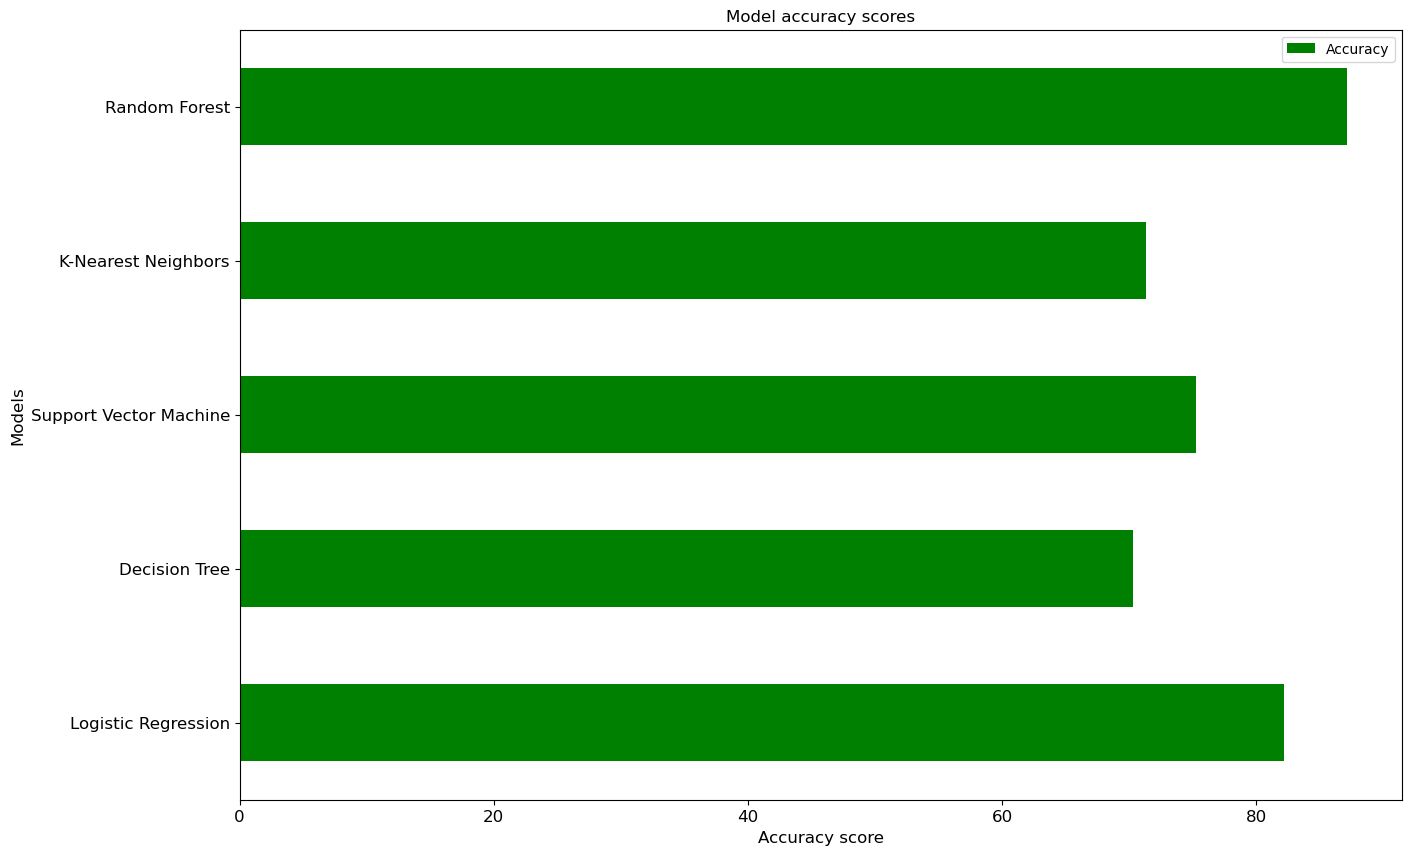

In [41]:
# plot the bargraph accuracy for the trained models
ax = final_df.plot(kind='barh', title ="Model accuracy scores", figsize=(15, 10), legend=True, fontsize=12, color="green")
ax.set_xlabel("Accuracy score", fontsize=12)
ax.set_ylabel("Models" , fontsize=12)
plt.savefig("Images/Trained_models_accuracy_scores.png")
plt.show()

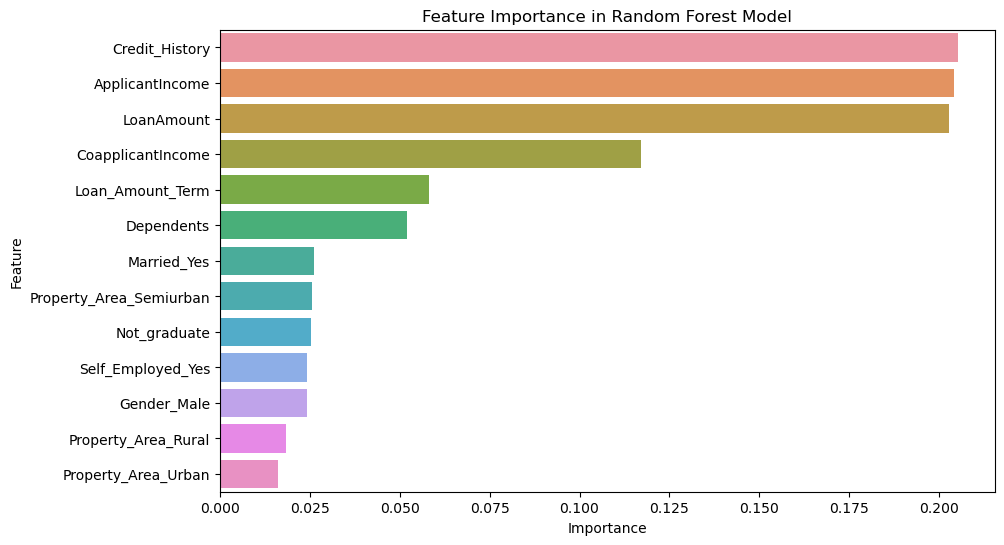

In [42]:
# Getting the feature importance values
importances = rfc_model.feature_importances_

# Creating a dataframe with feature names and importance values
importance_df = pd.DataFrame({"feature": X.columns, "importance": importances})

# Sorting the dataframe in descending order of importance
importance_df = importance_df.sort_values("importance", ascending=False)

# Plotting the feature importance values as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=importance_df)
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.savefig("Images/Feature_Importance_in_Random_Forest_Model")
plt.show()

As you can see, the most important feature in the random forest model is the


•	Applicant income


•	Credit history

•	LoanAmount

And followed by 


•	coapplicant income


•	Loan Amount term


•	dependents


This means that the Applicant income, Credit history, loan amount has the most influence on the prediction of the loan approval.


### Save The Model

In [43]:
# Define a dictionary of models
models = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Support Vector Machine': svc_model,
    'K-Nearest Neighbors': kn_model,
    'Random Forest': rfc_model
}
models
# evaluate and save best model
for model_name, model in models.items():
    if best_model_name == model_name:
        save_model = model
        print(save_model)
    

RandomForestClassifier()


In [44]:
with open("model.pkl", "wb") as f:
    pickle.dump(save_model, f)

In [45]:
with open("model.pkl", "rb") as f:
    saved_model = pickle.load(f)

In [46]:
saved_model

RandomForestClassifier()